In [1]:
import joblib
import gzip
import pandas
import pickle
import seaborn
import tqdm

from lib.models.generic_v0.model import map_params

In [2]:
import sys

util_dir = "./sprint-0-explicit-mdps/"
sys.path.append(util_dir)

import util

In [3]:
mdps = pandas.read_pickle("5-generated-mdps/fixed.pkl.gz")
mdps

,problem,model,force_consider_own,merge_isomorphic,truncate_common_chain,collect_garbage,reward_common_chain,protocol,dag_size_limit,size,time_spent,rss,mdp
0,ref-fc16,fc16sapirshtein,True,True,True,True,True,bitcoin,6,47,0.001538,0.173126,50078494
1,ref-aft20,aft20barzur,True,True,True,True,True,bitcoin,6,37,0.000903,0.173615,4a16dc21
2,v1,generic-v1,False,False,True,True,True,bitcoin,6,21327,13.848767,0.340729,416c9f9d
3,v1,generic-v1,False,False,True,True,True,ethereum_3,6,32961,22.734243,0.439922,71a849a3
4,v1,generic-v1,False,False,True,True,True,byzantium_3,6,33016,23.472438,0.440613,1945b557
5,v1,generic-v1,False,False,True,True,True,ghostdag_3,6,46966,36.048500,0.538666,3daa668c
6,v1,generic-v1,False,False,True,True,True,parallel_3,6,9122,5.335933,0.277988,3f76287b
7,v1+fc,generic-v1,True,False,True,True,True,bitcoin,6,549,0.246248,0.225689,272a9d97
8,v1+fc,generic-v1,True,False,True,True,True,ethereum_3,6,1179,0.725096,0.232243,7c8ea98f
9,v1+fc,generic-v1,True,False,True,True,True,byzantium_3,6,1109,0.753797,0.238491,2022fc5a


In [4]:
networks = []
# for alpha in range(35, 41, 5):
for alpha in range(5, 51, 5):
    for gamma in [0.33, 0.66]:
        # for gamma in [0, 0.5, 1]:
        networks.append(dict(alpha=alpha / 100, gamma=gamma))
# pandas.DataFrame(networks)

In [5]:
horizon = 100
stop_delta = (
    0.0001  # value iteration stops when no value estimate changes more than this value
)

In [6]:
def optimize(network, idx, row):
    with gzip.open(f"5-generated-mdps/mdp-{row.mdp}.pkl.gz", "rb") as f:
        emdp = pickle.load(f)
        emdp = map_params(emdp, **network)
        oae = util.optimize_and_evaluate(emdp, eps=stop_delta, horizon=horizon)
        return row.to_dict() | dict(horizon=horizon) | network | oae


def generate_jobs():
    for network in networks:
        for idx, row in mdps.iterrows():
            # if row['size'] > 1000:
            #    continue
            yield joblib.delayed(optimize)(network, idx, row)


jobs = list(generate_jobs())
generate_solutions = joblib.Parallel(return_as="generator_unordered", n_jobs=6)(jobs)
with_progress = tqdm.tqdm(generate_solutions, total=len(jobs))
df = pandas.DataFrame(with_progress)
df.to_pickle("5-value-iterations.pkl.gz")
df

  0%|                                                   | 0/480 [00:00<?, ?it/s]

  0%|                                           | 1/480 [00:00<04:37,  1.73it/s]

  1%|▎                                          | 3/480 [00:03<10:03,  1.27s/it]

  1%|▎                                          | 4/480 [00:09<23:34,  2.97s/it]

  1%|▍                                          | 5/480 [00:15<29:31,  3.73s/it]

  1%|▌                                          | 6/480 [00:21<37:25,  4.74s/it]

  1%|▋                                          | 7/480 [00:34<57:29,  7.29s/it]

  2%|▋                                        | 8/480 [00:51<1:19:24, 10.09s/it]

  2%|▊                                        | 9/480 [01:10<1:42:01, 13.00s/it]

  2%|▊                                       | 10/480 [01:45<2:34:56, 19.78s/it]

  2%|▉                                       | 11/480 [02:01<2:25:41, 18.64s/it]

  2%|█                                       | 12/480 [02:10<2:02:27, 15.70s/it]

  3%|█                                       | 13/480 [02:12<1:29:30, 11.50s/it]

  3%|█▏                                      | 14/480 [02:15<1:09:40,  8.97s/it]

  3%|█▎                                        | 15/480 [02:18<55:09,  7.12s/it]

  3%|█▍                                        | 16/480 [02:18<39:30,  5.11s/it]

  4%|█▍                                        | 17/480 [02:21<34:05,  4.42s/it]

  4%|█▌                                        | 18/480 [02:23<26:36,  3.46s/it]

  4%|█▋                                        | 19/480 [02:26<25:49,  3.36s/it]

  4%|█▊                                        | 20/480 [02:26<18:35,  2.43s/it]

  4%|█▊                                        | 21/480 [02:26<13:34,  1.77s/it]

  5%|█▉                                        | 22/480 [02:44<50:21,  6.60s/it]

  5%|█▉                                      | 23/480 [02:56<1:03:07,  8.29s/it]

  5%|██                                        | 24/480 [03:03<59:02,  7.77s/it]

  5%|██                                      | 25/480 [03:29<1:41:22, 13.37s/it]

  5%|██▏                                     | 26/480 [04:22<3:10:54, 25.23s/it]

  6%|██▎                                     | 27/480 [04:25<2:19:59, 18.54s/it]

  6%|██▎                                     | 28/480 [04:31<1:51:01, 14.74s/it]

  6%|██▍                                     | 29/480 [04:36<1:29:36, 11.92s/it]

  6%|██▌                                     | 30/480 [04:41<1:12:47,  9.70s/it]

  6%|██▋                                       | 31/480 [04:44<58:44,  7.85s/it]

  7%|██▋                                     | 32/480 [04:53<1:01:32,  8.24s/it]

  7%|██▊                                     | 33/480 [05:22<1:46:53, 14.35s/it]

  7%|██▊                                     | 34/480 [05:46<2:08:39, 17.31s/it]

  7%|██▉                                     | 35/480 [05:48<1:33:40, 12.63s/it]

  8%|███                                     | 36/480 [05:54<1:19:03, 10.68s/it]

  8%|███▏                                      | 37/480 [05:56<59:14,  8.02s/it]

  8%|███▎                                      | 38/480 [05:57<44:24,  6.03s/it]

  8%|███▍                                      | 39/480 [05:59<34:56,  4.75s/it]

  8%|███▌                                      | 40/480 [06:00<26:40,  3.64s/it]

  9%|███▌                                      | 41/480 [06:02<22:52,  3.13s/it]

  9%|███▋                                      | 42/480 [06:03<18:14,  2.50s/it]

  9%|███▊                                      | 43/480 [06:06<18:56,  2.60s/it]

  9%|███▊                                      | 44/480 [06:06<13:50,  1.90s/it]

  9%|███▉                                      | 45/480 [06:07<10:15,  1.42s/it]

 10%|████                                      | 46/480 [06:14<24:09,  3.34s/it]

 10%|████                                      | 47/480 [06:32<55:22,  7.67s/it]

 10%|████                                    | 48/480 [06:45<1:05:40,  9.12s/it]

 10%|████                                    | 49/480 [08:47<5:09:42, 43.11s/it]

 10%|████▏                                   | 50/480 [09:48<5:48:14, 48.59s/it]

 11%|████▎                                   | 51/480 [09:52<4:10:20, 35.01s/it]

 11%|████▎                                   | 52/480 [09:52<2:55:15, 24.57s/it]

 11%|████▍                                   | 53/480 [09:57<2:12:08, 18.57s/it]

 11%|████▌                                   | 54/480 [09:58<1:35:09, 13.40s/it]

 11%|████▌                                   | 55/480 [09:59<1:08:15,  9.64s/it]

 12%|████▋                                   | 56/480 [10:05<1:00:51,  8.61s/it]

 12%|████▉                                     | 57/480 [10:12<57:10,  8.11s/it]

 12%|████▊                                   | 58/480 [10:40<1:38:37, 14.02s/it]

 12%|████▉                                   | 59/480 [10:43<1:15:23, 10.74s/it]

 12%|█████▎                                    | 60/480 [10:44<55:40,  7.95s/it]

 13%|█████▎                                    | 61/480 [10:46<43:10,  6.18s/it]

 13%|█████▍                                    | 62/480 [10:50<38:43,  5.56s/it]

 13%|█████▌                                    | 63/480 [10:54<33:48,  4.86s/it]

 13%|█████▌                                    | 64/480 [10:54<24:19,  3.51s/it]

 14%|█████▋                                    | 65/480 [10:57<22:54,  3.31s/it]

 14%|█████▊                                    | 66/480 [10:57<17:04,  2.48s/it]

 14%|█████▊                                    | 67/480 [11:01<19:36,  2.85s/it]

 14%|█████▉                                    | 68/480 [11:01<14:15,  2.08s/it]

 14%|██████                                    | 69/480 [11:02<10:27,  1.53s/it]

 15%|██████▏                                   | 70/480 [11:11<27:25,  4.01s/it]

 15%|██████▏                                   | 71/480 [11:12<20:29,  3.01s/it]

 15%|██████                                  | 72/480 [11:48<1:28:27, 13.01s/it]

 15%|██████                                  | 73/480 [13:35<4:38:38, 41.08s/it]

 15%|██████▏                                 | 74/480 [14:06<4:16:49, 37.95s/it]

 16%|██████▎                                 | 75/480 [14:09<3:05:51, 27.54s/it]

 16%|██████▎                                 | 76/480 [14:16<2:24:51, 21.51s/it]

 16%|██████▍                                 | 77/480 [14:23<1:53:45, 16.94s/it]

 16%|██████▌                                 | 78/480 [14:30<1:35:14, 14.21s/it]

 16%|██████▌                                 | 79/480 [14:32<1:09:24, 10.39s/it]

 17%|███████                                   | 81/480 [14:45<57:10,  8.60s/it]

 17%|███████▏                                  | 82/480 [14:55<59:48,  9.02s/it]

 17%|██████▉                                 | 83/480 [15:15<1:17:29, 11.71s/it]

 18%|███████                                 | 84/480 [15:25<1:15:05, 11.38s/it]

 18%|███████▍                                  | 85/480 [15:27<57:46,  8.78s/it]

 18%|███████▌                                  | 86/480 [15:31<48:11,  7.34s/it]

 18%|███████▌                                  | 87/480 [15:34<40:14,  6.14s/it]

 18%|███████▋                                  | 88/480 [15:37<34:34,  5.29s/it]

 19%|███████▊                                  | 89/480 [15:39<27:00,  4.14s/it]

 19%|███████▉                                  | 90/480 [15:41<22:39,  3.49s/it]

 19%|███████▉                                  | 91/480 [15:42<18:25,  2.84s/it]

 19%|████████                                  | 92/480 [15:42<13:27,  2.08s/it]

 19%|████████▏                                 | 93/480 [15:42<09:55,  1.54s/it]

 20%|████████▏                                 | 94/480 [15:43<07:52,  1.22s/it]

 20%|████████▎                                 | 95/480 [15:54<26:15,  4.09s/it]

 20%|████████▍                                 | 96/480 [16:04<37:12,  5.81s/it]

 20%|████████                                | 97/480 [18:31<5:07:17, 48.14s/it]

 20%|████████▏                               | 98/480 [19:34<5:34:34, 52.55s/it]

 21%|████████▎                               | 99/480 [19:35<3:56:07, 37.19s/it]

 21%|████████▏                              | 100/480 [19:38<2:50:23, 26.90s/it]

 21%|████████▏                              | 101/480 [19:44<2:10:09, 20.61s/it]

 21%|████████▎                              | 102/480 [19:45<1:32:49, 14.73s/it]

 21%|████████▎                              | 103/480 [19:52<1:18:26, 12.48s/it]

 22%|████████▍                              | 104/480 [19:57<1:04:59, 10.37s/it]

 22%|████████▉                                | 105/480 [19:59<47:37,  7.62s/it]

 22%|████████▌                              | 106/480 [20:22<1:16:54, 12.34s/it]

 22%|████████▋                              | 107/480 [20:26<1:00:59,  9.81s/it]

 22%|████████▊                              | 108/480 [20:37<1:03:04, 10.17s/it]

 23%|█████████▎                               | 109/480 [20:39<47:39,  7.71s/it]

 23%|█████████▍                               | 110/480 [20:39<33:31,  5.44s/it]

 23%|█████████▍                               | 111/480 [20:42<29:34,  4.81s/it]

 23%|█████████▌                               | 112/480 [20:43<21:45,  3.55s/it]

 24%|█████████▋                               | 113/480 [20:46<20:42,  3.39s/it]

 24%|█████████▋                               | 114/480 [20:47<15:46,  2.59s/it]

 24%|█████████▊                               | 115/480 [20:51<18:37,  3.06s/it]

 24%|█████████▉                               | 116/480 [20:51<13:34,  2.24s/it]

 24%|█████████▉                               | 117/480 [20:51<09:57,  1.64s/it]

 25%|██████████                               | 118/480 [21:01<24:50,  4.12s/it]

 25%|██████████▏                              | 119/480 [21:14<41:09,  6.84s/it]

 25%|█████████▊                             | 120/480 [21:39<1:13:01, 12.17s/it]

 25%|█████████▊                             | 121/480 [23:41<4:30:37, 45.23s/it]

 25%|█████████▉                             | 122/480 [24:47<5:05:38, 51.22s/it]

 26%|█████████▉                             | 123/480 [24:48<3:36:15, 36.35s/it]

 26%|██████████                             | 124/480 [24:50<2:34:16, 26.00s/it]

 26%|██████████▏                            | 125/480 [24:56<1:57:44, 19.90s/it]

 26%|██████████▏                            | 126/480 [24:56<1:23:11, 14.10s/it]

 26%|██████████▎                            | 127/480 [24:58<1:01:02, 10.37s/it]

 27%|██████████▉                              | 128/480 [25:05<54:13,  9.24s/it]

 27%|███████████                              | 129/480 [25:11<49:13,  8.41s/it]

 27%|███████████                              | 130/480 [25:13<37:59,  6.51s/it]

 27%|██████████▋                            | 131/480 [25:44<1:19:47, 13.72s/it]

 28%|██████████▋                            | 132/480 [25:55<1:15:40, 13.05s/it]

 28%|███████████▎                             | 133/480 [25:57<56:35,  9.79s/it]

 28%|███████████▍                             | 134/480 [26:01<46:33,  8.07s/it]

 28%|███████████▌                             | 135/480 [26:04<37:18,  6.49s/it]

 28%|███████████▌                             | 136/480 [26:05<27:00,  4.71s/it]

 29%|███████████▋                             | 137/480 [26:08<24:06,  4.22s/it]

 29%|███████████▊                             | 138/480 [26:09<18:56,  3.32s/it]

 29%|███████████▊                             | 139/480 [26:13<20:30,  3.61s/it]

 29%|███████████▉                             | 140/480 [26:14<14:48,  2.61s/it]

 29%|████████████                             | 141/480 [26:14<10:47,  1.91s/it]

 30%|████████████▏                            | 142/480 [26:16<10:36,  1.88s/it]

 30%|████████████▏                            | 143/480 [26:20<15:13,  2.71s/it]

 30%|████████████▎                            | 144/480 [26:28<22:58,  4.10s/it]

 30%|███████████▊                           | 145/480 [29:17<4:59:27, 53.63s/it]

 30%|███████████▊                           | 146/480 [30:10<4:57:21, 53.42s/it]

 31%|███████████▉                           | 147/480 [30:13<3:33:29, 38.47s/it]

 31%|████████████                           | 148/480 [30:22<2:42:59, 29.46s/it]

 31%|████████████                           | 149/480 [30:28<2:03:03, 22.31s/it]

 31%|████████████▏                          | 150/480 [30:29<1:28:06, 16.02s/it]

 31%|████████████▎                          | 151/480 [30:36<1:13:27, 13.40s/it]

 32%|████████████▎                          | 152/480 [30:43<1:03:04, 11.54s/it]

 32%|████████████▍                          | 153/480 [31:02<1:14:31, 13.68s/it]

 32%|█████████████▏                           | 154/480 [31:06<58:57, 10.85s/it]

 32%|█████████████▏                           | 155/480 [31:08<44:22,  8.19s/it]

 32%|█████████████▎                           | 156/480 [31:20<50:27,  9.34s/it]

 33%|█████████████▍                           | 157/480 [31:22<38:39,  7.18s/it]

 33%|█████████████▍                           | 158/480 [31:26<32:41,  6.09s/it]

 33%|█████████████▌                           | 159/480 [31:27<23:59,  4.48s/it]

 33%|█████████████▋                           | 160/480 [31:30<21:35,  4.05s/it]

 34%|█████████████▊                           | 161/480 [31:31<16:35,  3.12s/it]

 34%|█████████████▊                           | 162/480 [31:34<16:30,  3.11s/it]

 34%|█████████████▉                           | 163/480 [31:36<14:37,  2.77s/it]

 34%|██████████████                           | 164/480 [31:36<10:40,  2.03s/it]

 34%|██████████████                           | 165/480 [31:36<07:51,  1.50s/it]

 35%|██████████████▏                          | 166/480 [32:10<57:43, 11.03s/it]

 35%|██████████████▎                          | 167/480 [32:10<41:15,  7.91s/it]

 35%|██████████████▎                          | 168/480 [32:29<58:41, 11.29s/it]

 35%|█████████████▋                         | 169/480 [34:32<3:51:49, 44.73s/it]

 35%|█████████████▊                         | 170/480 [35:38<4:24:04, 51.11s/it]

 36%|█████████████▉                         | 171/480 [35:42<3:10:03, 36.90s/it]

 36%|█████████████▉                         | 172/480 [35:50<2:25:45, 28.39s/it]

 36%|██████████████                         | 173/480 [35:57<1:51:56, 21.88s/it]

 36%|██████████████▏                        | 174/480 [36:06<1:31:18, 17.90s/it]

 36%|██████████████▏                        | 175/480 [36:15<1:18:12, 15.39s/it]

 37%|███████████████                          | 176/480 [36:17<57:07, 11.28s/it]

 37%|███████████████                          | 177/480 [36:20<45:03,  8.92s/it]

 37%|██████████████▍                        | 178/480 [36:59<1:30:20, 17.95s/it]

 37%|██████████████▌                        | 179/480 [37:04<1:10:11, 13.99s/it]

 38%|██████████████▋                        | 180/480 [37:15<1:05:51, 13.17s/it]

 38%|███████████████▍                         | 181/480 [37:16<47:36,  9.55s/it]

 38%|███████████████▌                         | 182/480 [37:18<35:08,  7.08s/it]

 38%|███████████████▋                         | 183/480 [37:21<29:43,  6.01s/it]

 38%|███████████████▋                         | 184/480 [37:22<21:30,  4.36s/it]

 39%|███████████████▊                         | 185/480 [37:25<19:28,  3.96s/it]

 39%|███████████████▉                         | 186/480 [37:25<14:30,  2.96s/it]

 39%|███████████████▉                         | 187/480 [37:30<16:04,  3.29s/it]

 39%|████████████████                         | 188/480 [37:30<11:39,  2.40s/it]

 39%|████████████████▏                        | 189/480 [37:30<08:30,  1.76s/it]

 40%|████████████████▏                        | 190/480 [37:32<09:20,  1.93s/it]

 40%|████████████████▎                        | 191/480 [37:46<25:42,  5.34s/it]

 40%|███████████████▌                       | 192/480 [38:21<1:08:05, 14.19s/it]

 40%|███████████████▋                       | 193/480 [40:40<4:07:05, 51.66s/it]

 40%|███████████████▊                       | 194/480 [41:48<4:30:01, 56.65s/it]

 41%|███████████████▊                       | 195/480 [41:51<3:13:03, 40.65s/it]

 41%|███████████████▉                       | 196/480 [41:52<2:16:09, 28.76s/it]

 41%|████████████████                       | 197/480 [42:00<1:45:28, 22.36s/it]

 41%|████████████████                       | 198/480 [42:00<1:14:33, 15.86s/it]

 41%|████████████████▏                      | 199/480 [42:08<1:03:05, 13.47s/it]

 42%|█████████████████                        | 200/480 [42:15<53:56, 11.56s/it]

 42%|█████████████████▏                       | 201/480 [42:30<58:18, 12.54s/it]

 42%|████████████████▍                      | 202/480 [42:46<1:02:59, 13.60s/it]

 42%|████████████████▍                      | 203/480 [42:59<1:01:33, 13.34s/it]

 42%|████████████████▌                      | 204/480 [43:12<1:00:51, 13.23s/it]

 43%|█████████████████▌                       | 205/480 [43:14<45:27,  9.92s/it]

 43%|█████████████████▌                       | 206/480 [43:19<37:57,  8.31s/it]

 43%|█████████████████▋                       | 207/480 [43:22<30:45,  6.76s/it]

 43%|█████████████████▊                       | 208/480 [43:23<22:27,  4.95s/it]

 44%|█████████████████▊                       | 209/480 [43:26<20:02,  4.44s/it]

 44%|█████████████████▉                       | 210/480 [43:26<14:49,  3.29s/it]

 44%|██████████████████                       | 211/480 [43:31<16:12,  3.62s/it]

 44%|██████████████████                       | 212/480 [43:31<11:47,  2.64s/it]

 44%|██████████████████▏                      | 213/480 [43:32<08:35,  1.93s/it]

 45%|██████████████████▎                      | 214/480 [43:43<20:57,  4.73s/it]

 45%|██████████████████▎                      | 215/480 [43:54<28:59,  6.56s/it]

 45%|██████████████████▍                      | 216/480 [44:12<43:50,  9.97s/it]

 45%|█████████████████▋                     | 217/480 [47:18<4:35:50, 62.93s/it]

 45%|█████████████████▋                     | 218/480 [48:26<4:41:54, 64.56s/it]

 46%|█████████████████▊                     | 219/480 [48:30<3:21:46, 46.38s/it]

 46%|█████████████████▉                     | 220/480 [48:31<2:21:26, 32.64s/it]

 46%|█████████████████▉                     | 221/480 [48:33<1:40:50, 23.36s/it]

 46%|██████████████████                     | 222/480 [48:39<1:18:06, 18.16s/it]

 46%|███████████████████                      | 223/480 [48:39<55:13, 12.89s/it]

 47%|███████████████████▏                     | 224/480 [48:41<41:20,  9.69s/it]

 47%|███████████████████▏                     | 225/480 [48:55<45:38, 10.74s/it]

 47%|███████████████████▎                     | 226/480 [49:07<47:48, 11.29s/it]

 47%|███████████████████▍                     | 227/480 [49:11<38:29,  9.13s/it]

 48%|███████████████████▍                     | 228/480 [49:24<42:32, 10.13s/it]

 48%|███████████████████▌                     | 229/480 [49:26<32:53,  7.86s/it]

 48%|███████████████████▋                     | 230/480 [49:31<29:01,  6.97s/it]

 48%|███████████████████▋                     | 231/480 [49:36<26:08,  6.30s/it]

 48%|███████████████████▊                     | 232/480 [49:40<22:40,  5.48s/it]

 49%|███████████████████▉                     | 233/480 [49:40<16:47,  4.08s/it]

 49%|███████████████████▉                     | 234/480 [49:43<15:12,  3.71s/it]

 49%|████████████████████                     | 235/480 [49:45<13:20,  3.27s/it]

 49%|████████████████████▏                    | 236/480 [49:46<09:41,  2.38s/it]

 49%|████████████████████▏                    | 237/480 [49:46<07:04,  1.75s/it]

 50%|████████████████████▎                    | 238/480 [50:18<44:10, 10.95s/it]

 50%|████████████████████▍                    | 239/480 [50:22<34:57,  8.70s/it]

 50%|████████████████████▌                    | 240/480 [50:35<39:34,  9.89s/it]

 50%|███████████████████▌                   | 241/480 [53:05<3:26:55, 51.95s/it]

 50%|███████████████████▋                   | 242/480 [54:19<3:53:12, 58.79s/it]

 51%|███████████████████▋                   | 243/480 [54:23<2:47:01, 42.28s/it]

 51%|███████████████████▊                   | 244/480 [54:33<2:08:17, 32.62s/it]

 51%|███████████████████▉                   | 245/480 [54:37<1:33:50, 23.96s/it]

 51%|███████████████████▉                   | 246/480 [54:40<1:09:13, 17.75s/it]

 51%|█████████████████████                    | 247/480 [54:45<54:02, 13.92s/it]

 52%|█████████████████████▏                   | 248/480 [54:46<38:32,  9.97s/it]

 52%|█████████████████████▎                   | 249/480 [54:56<38:25,  9.98s/it]

 52%|████████████████████▎                  | 250/480 [55:37<1:14:07, 19.34s/it]

 52%|████████████████████▍                  | 251/480 [56:00<1:18:17, 20.51s/it]

 52%|████████████████████▍                  | 252/480 [56:12<1:08:00, 17.90s/it]

 53%|█████████████████████▌                   | 253/480 [56:15<50:02, 13.23s/it]

 53%|█████████████████████▋                   | 254/480 [56:15<35:02,  9.30s/it]

 53%|█████████████████████▊                   | 255/480 [56:18<27:48,  7.41s/it]

 53%|█████████████████████▊                   | 256/480 [56:18<20:14,  5.42s/it]

 54%|█████████████████████▉                   | 257/480 [56:19<15:10,  4.08s/it]

 54%|██████████████████████                   | 258/480 [56:22<12:52,  3.48s/it]

 54%|██████████████████████                   | 259/480 [56:22<09:51,  2.68s/it]

 54%|██████████████████████▏                  | 260/480 [56:23<07:19,  2.00s/it]

 54%|██████████████████████▎                  | 261/480 [56:23<05:31,  1.51s/it]

 55%|██████████████████████▍                  | 262/480 [56:25<05:52,  1.62s/it]

 55%|██████████████████████▍                  | 263/480 [56:36<16:30,  4.56s/it]

 55%|██████████████████████▌                  | 264/480 [57:07<44:37, 12.40s/it]

 55%|████████████████████▍                | 265/480 [1:00:48<4:28:43, 74.99s/it]

 55%|████████████████████▌                | 266/480 [1:01:48<4:11:15, 70.45s/it]

 56%|████████████████████▌                | 267/480 [1:01:54<3:01:03, 51.00s/it]

 56%|████████████████████▋                | 268/480 [1:02:03<2:16:01, 38.50s/it]

 56%|████████████████████▋                | 269/480 [1:02:08<1:40:35, 28.60s/it]

 56%|████████████████████▊                | 270/480 [1:02:12<1:13:20, 20.95s/it]

 56%|██████████████████████                 | 271/480 [1:02:17<56:46, 16.30s/it]

 57%|██████████████████████                 | 272/480 [1:02:18<40:50, 11.78s/it]

 57%|██████████████████████▏                | 273/480 [1:02:23<33:15,  9.64s/it]

 57%|██████████████████████▎                | 274/480 [1:02:25<25:39,  7.47s/it]

 57%|██████████████████████▎                | 275/480 [1:02:37<30:18,  8.87s/it]

 57%|██████████████████████▍                | 276/480 [1:02:51<34:51, 10.25s/it]

 58%|██████████████████████▌                | 277/480 [1:02:54<27:17,  8.07s/it]

 58%|██████████████████████▌                | 278/480 [1:03:00<24:46,  7.36s/it]

 58%|██████████████████████▋                | 279/480 [1:03:04<21:29,  6.42s/it]

 58%|██████████████████████▊                | 280/480 [1:03:08<18:41,  5.61s/it]

 59%|██████████████████████▊                | 281/480 [1:03:11<16:18,  4.92s/it]

 59%|██████████████████████▉                | 282/480 [1:03:16<16:49,  5.10s/it]

 59%|██████████████████████▉                | 283/480 [1:03:27<22:23,  6.82s/it]

 59%|███████████████████████                | 284/480 [1:03:28<15:58,  4.89s/it]

 59%|███████████████████████▏               | 285/480 [1:03:28<11:25,  3.51s/it]

 60%|███████████████████████▏               | 286/480 [1:03:53<32:07,  9.94s/it]

 60%|███████████████████████▎               | 287/480 [1:04:01<29:59,  9.33s/it]

 60%|███████████████████████▍               | 288/480 [1:04:09<28:53,  9.03s/it]

 60%|██████████████████████▎              | 289/480 [1:07:41<3:42:59, 70.05s/it]

 60%|██████████████████████▎              | 290/480 [1:08:29<3:20:18, 63.26s/it]

 61%|██████████████████████▍              | 291/480 [1:08:34<2:24:01, 45.72s/it]

 61%|██████████████████████▌              | 292/480 [1:08:44<1:50:16, 35.19s/it]

 61%|██████████████████████▌              | 293/480 [1:08:52<1:24:22, 27.07s/it]

 61%|██████████████████████▋              | 294/480 [1:09:00<1:05:28, 21.12s/it]

 61%|███████████████████████▉               | 295/480 [1:09:01<46:47, 15.18s/it]

 62%|████████████████████████               | 296/480 [1:09:02<33:21, 10.88s/it]

 62%|████████████████████████▏              | 297/480 [1:09:16<36:12, 11.87s/it]

 62%|████████████████████████▏              | 298/480 [1:09:52<57:30, 18.96s/it]

 62%|████████████████████████▎              | 299/480 [1:10:11<57:27, 19.05s/it]

 62%|████████████████████████▍              | 300/480 [1:10:15<43:49, 14.61s/it]

 63%|████████████████████████▍              | 301/480 [1:10:18<33:14, 11.14s/it]

 63%|████████████████████████▌              | 302/480 [1:10:23<27:33,  9.29s/it]

 63%|████████████████████████▌              | 303/480 [1:10:25<21:13,  7.19s/it]

 63%|████████████████████████▋              | 304/480 [1:10:27<16:24,  5.60s/it]

 64%|████████████████████████▊              | 305/480 [1:10:29<13:08,  4.51s/it]

 64%|████████████████████████▊              | 306/480 [1:10:31<10:41,  3.69s/it]

 64%|████████████████████████▉              | 307/480 [1:10:35<10:59,  3.81s/it]

 64%|█████████████████████████              | 308/480 [1:10:36<08:03,  2.81s/it]

 64%|█████████████████████████              | 309/480 [1:10:36<05:55,  2.08s/it]

 65%|█████████████████████████▏             | 310/480 [1:10:45<11:55,  4.21s/it]

 65%|█████████████████████████▎             | 311/480 [1:11:04<24:26,  8.68s/it]

 65%|█████████████████████████▎             | 312/480 [1:11:30<38:43, 13.83s/it]

 65%|████████████████████████▏            | 313/480 [1:15:15<3:34:42, 77.14s/it]

 65%|████████████████████████▏            | 314/480 [1:16:36<3:37:01, 78.44s/it]

 66%|████████████████████████▎            | 315/480 [1:16:42<2:35:21, 56.49s/it]

 66%|████████████████████████▎            | 316/480 [1:16:46<1:51:17, 40.72s/it]

 66%|████████████████████████▍            | 317/480 [1:16:53<1:23:13, 30.63s/it]

 66%|█████████████████████████▊             | 318/480 [1:16:55<59:32, 22.05s/it]

 66%|█████████████████████████▉             | 319/480 [1:17:02<47:03, 17.54s/it]

 67%|██████████████████████████             | 320/480 [1:17:10<39:21, 14.76s/it]

 67%|██████████████████████████             | 321/480 [1:17:12<29:07, 10.99s/it]

 67%|██████████████████████████▏            | 322/480 [1:17:14<21:25,  8.14s/it]

 67%|██████████████████████████▏            | 323/480 [1:17:45<39:35, 15.13s/it]

 68%|██████████████████████████▎            | 324/480 [1:18:00<38:52, 14.95s/it]

 68%|██████████████████████████▍            | 325/480 [1:18:03<29:25, 11.39s/it]

 68%|██████████████████████████▍            | 326/480 [1:18:08<24:24,  9.51s/it]

 68%|██████████████████████████▌            | 327/480 [1:18:12<20:21,  7.99s/it]

 68%|██████████████████████████▋            | 328/480 [1:18:17<17:23,  6.87s/it]

 69%|██████████████████████████▋            | 329/480 [1:18:18<12:51,  5.11s/it]

 69%|██████████████████████████▊            | 330/480 [1:18:20<11:02,  4.42s/it]

 69%|██████████████████████████▉            | 331/480 [1:18:24<10:13,  4.12s/it]

 69%|██████████████████████████▉            | 332/480 [1:18:24<07:25,  3.01s/it]

 69%|███████████████████████████            | 333/480 [1:18:24<05:23,  2.20s/it]

 70%|███████████████████████████▏           | 334/480 [1:18:52<23:47,  9.77s/it]

 70%|███████████████████████████▏           | 335/480 [1:18:52<16:42,  6.91s/it]

 70%|███████████████████████████▎           | 336/480 [1:19:12<26:14, 10.94s/it]

 70%|█████████████████████████▉           | 337/480 [1:22:57<2:58:31, 74.90s/it]

 70%|██████████████████████████           | 338/480 [1:24:24<3:05:54, 78.55s/it]

 71%|██████████████████████████▏          | 339/480 [1:24:29<2:13:05, 56.64s/it]

 71%|██████████████████████████▏          | 340/480 [1:24:34<1:35:48, 41.06s/it]

 71%|██████████████████████████▎          | 341/480 [1:24:39<1:10:07, 30.27s/it]

 71%|███████████████████████████▊           | 342/480 [1:24:42<51:04, 22.20s/it]

 71%|███████████████████████████▊           | 343/480 [1:24:49<40:12, 17.61s/it]

 72%|███████████████████████████▉           | 344/480 [1:24:58<33:44, 14.89s/it]

 72%|████████████████████████████           | 345/480 [1:25:10<31:25, 13.96s/it]

 72%|████████████████████████████           | 346/480 [1:25:16<25:53, 11.59s/it]

 72%|████████████████████████████▏          | 347/480 [1:25:57<45:12, 20.40s/it]

 72%|████████████████████████████▎          | 348/480 [1:26:05<36:39, 16.66s/it]

 73%|████████████████████████████▎          | 349/480 [1:26:08<27:25, 12.56s/it]

 73%|████████████████████████████▍          | 350/480 [1:26:12<21:53, 10.10s/it]

 73%|████████████████████████████▌          | 351/480 [1:26:13<15:46,  7.34s/it]

 73%|████████████████████████████▌          | 352/480 [1:26:16<13:18,  6.23s/it]

 74%|████████████████████████████▋          | 353/480 [1:26:17<09:29,  4.48s/it]

 74%|████████████████████████████▊          | 354/480 [1:26:21<09:10,  4.37s/it]

 74%|████████████████████████████▊          | 355/480 [1:26:23<07:49,  3.75s/it]

 74%|████████████████████████████▉          | 356/480 [1:26:24<05:42,  2.76s/it]

 74%|█████████████████████████████          | 357/480 [1:26:24<04:11,  2.04s/it]

 75%|█████████████████████████████          | 358/480 [1:26:50<18:44,  9.22s/it]

 75%|█████████████████████████████▏         | 359/480 [1:26:56<16:37,  8.24s/it]

 75%|█████████████████████████████▎         | 360/480 [1:27:10<19:54,  9.95s/it]

 75%|███████████████████████████▊         | 361/480 [1:31:27<2:46:50, 84.13s/it]

 75%|███████████████████████████▉         | 362/480 [1:32:49<2:44:16, 83.53s/it]

 76%|███████████████████████████▉         | 363/480 [1:32:54<1:56:27, 59.72s/it]

 76%|████████████████████████████         | 364/480 [1:32:55<1:21:51, 42.34s/it]

 76%|████████████████████████████▏        | 365/480 [1:33:04<1:01:41, 32.19s/it]

 76%|█████████████████████████████▋         | 366/480 [1:33:04<42:54, 22.58s/it]

 76%|█████████████████████████████▊         | 367/480 [1:33:08<32:01, 17.00s/it]

 77%|█████████████████████████████▉         | 368/480 [1:33:14<25:19, 13.57s/it]

 77%|█████████████████████████████▉         | 369/480 [1:33:19<20:44, 11.21s/it]

 77%|██████████████████████████████         | 370/480 [1:34:07<40:28, 22.08s/it]

 77%|██████████████████████████████▏        | 371/480 [1:34:23<37:07, 20.44s/it]

 78%|██████████████████████████████▏        | 372/480 [1:34:32<30:24, 16.89s/it]

 78%|██████████████████████████████▎        | 373/480 [1:34:35<22:53, 12.84s/it]

 78%|██████████████████████████████▍        | 374/480 [1:34:38<17:32,  9.93s/it]

 78%|██████████████████████████████▍        | 375/480 [1:34:41<13:21,  7.63s/it]

 78%|██████████████████████████████▌        | 376/480 [1:34:43<10:30,  6.06s/it]

 79%|██████████████████████████████▋        | 377/480 [1:34:45<08:15,  4.81s/it]

 79%|██████████████████████████████▋        | 378/480 [1:34:48<07:02,  4.14s/it]

 79%|██████████████████████████████▊        | 379/480 [1:34:52<07:02,  4.18s/it]

 79%|██████████████████████████████▉        | 380/480 [1:34:52<05:06,  3.06s/it]

 79%|██████████████████████████████▉        | 381/480 [1:34:53<03:41,  2.24s/it]

 80%|███████████████████████████████        | 382/480 [1:35:03<07:50,  4.80s/it]

 80%|███████████████████████████████        | 383/480 [1:35:23<15:11,  9.40s/it]

 80%|███████████████████████████████▏       | 384/480 [1:35:51<23:40, 14.80s/it]

 80%|█████████████████████████████▋       | 385/480 [1:39:48<2:09:02, 81.50s/it]

 80%|█████████████████████████████▊       | 386/480 [1:41:28<2:16:08, 86.90s/it]

 81%|█████████████████████████████▊       | 387/480 [1:41:28<1:34:29, 60.96s/it]

 81%|█████████████████████████████▉       | 388/480 [1:41:33<1:07:38, 44.11s/it]

 81%|███████████████████████████████▌       | 389/480 [1:41:39<49:36, 32.71s/it]

 81%|███████████████████████████████▋       | 390/480 [1:41:42<35:44, 23.83s/it]

 81%|███████████████████████████████▊       | 391/480 [1:41:49<28:03, 18.91s/it]

 82%|███████████████████████████████▊       | 392/480 [1:41:58<23:10, 15.80s/it]

 82%|███████████████████████████████▉       | 393/480 [1:42:10<21:27, 14.80s/it]

 82%|████████████████████████████████       | 394/480 [1:42:13<16:06, 11.24s/it]

 82%|████████████████████████████████       | 395/480 [1:42:41<22:48, 16.10s/it]

 82%|████████████████████████████████▏      | 396/480 [1:42:58<23:05, 16.50s/it]

 83%|████████████████████████████████▎      | 397/480 [1:43:01<17:15, 12.48s/it]

 83%|████████████████████████████████▎      | 398/480 [1:43:07<14:06, 10.33s/it]

 83%|████████████████████████████████▍      | 399/480 [1:43:11<11:35,  8.59s/it]

 83%|████████████████████████████████▌      | 400/480 [1:43:12<08:16,  6.20s/it]

 84%|████████████████████████████████▌      | 401/480 [1:43:16<07:23,  5.62s/it]

 84%|████████████████████████████████▋      | 403/480 [1:43:23<05:48,  4.52s/it]

 84%|████████████████████████████████▊      | 404/480 [1:43:23<04:27,  3.52s/it]

 84%|████████████████████████████████▉      | 405/480 [1:43:23<03:21,  2.69s/it]

 85%|████████████████████████████████▉      | 406/480 [1:43:59<14:19, 11.61s/it]

 85%|█████████████████████████████████      | 407/480 [1:44:00<10:41,  8.79s/it]

 85%|█████████████████████████████████▏     | 408/480 [1:44:19<14:03, 11.71s/it]

 85%|███████████████████████████████▌     | 409/480 [1:48:49<1:42:27, 86.58s/it]

 85%|███████████████████████████████▌     | 410/480 [1:50:26<1:44:18, 89.40s/it]

 86%|███████████████████████████████▋     | 411/480 [1:50:28<1:13:25, 63.85s/it]

 86%|█████████████████████████████████▍     | 412/480 [1:50:33<52:21, 46.20s/it]

 86%|█████████████████████████████████▌     | 413/480 [1:50:40<38:32, 34.51s/it]

 86%|█████████████████████████████████▋     | 414/480 [1:50:42<27:23, 24.89s/it]

 86%|█████████████████████████████████▋     | 415/480 [1:50:50<21:27, 19.81s/it]

 87%|█████████████████████████████████▊     | 416/480 [1:50:52<15:27, 14.49s/it]

 87%|█████████████████████████████████▉     | 417/480 [1:50:59<12:49, 12.22s/it]

 87%|█████████████████████████████████▉     | 418/480 [1:51:42<22:14, 21.52s/it]

 87%|██████████████████████████████████     | 419/480 [1:52:18<26:12, 25.77s/it]

 88%|██████████████████████████████████▏    | 420/480 [1:52:21<19:10, 19.17s/it]

 88%|██████████████████████████████████▏    | 421/480 [1:52:26<14:26, 14.68s/it]

 88%|██████████████████████████████████▎    | 422/480 [1:52:31<11:37, 12.03s/it]

 88%|██████████████████████████████████▎    | 423/480 [1:52:35<08:56,  9.40s/it]

 88%|██████████████████████████████████▍    | 424/480 [1:52:37<06:38,  7.11s/it]

 89%|██████████████████████████████████▌    | 425/480 [1:52:39<05:11,  5.67s/it]

 89%|██████████████████████████████████▌    | 426/480 [1:52:40<03:59,  4.44s/it]

 89%|██████████████████████████████████▋    | 427/480 [1:52:46<04:10,  4.73s/it]

 89%|██████████████████████████████████▊    | 428/480 [1:52:46<03:02,  3.50s/it]

 89%|██████████████████████████████████▊    | 429/480 [1:52:47<02:10,  2.56s/it]

 90%|██████████████████████████████████▉    | 430/480 [1:52:53<03:02,  3.64s/it]

 90%|███████████████████████████████████    | 431/480 [1:53:15<07:25,  9.08s/it]

 90%|███████████████████████████████████    | 432/480 [1:53:29<08:33, 10.70s/it]

 90%|█████████████████████████████████▍   | 433/480 [1:57:57<1:08:41, 87.69s/it]

 90%|█████████████████████████████████▍   | 434/480 [1:59:41<1:11:03, 92.68s/it]

 91%|███████████████████████████████████▎   | 435/480 [1:59:42<48:51, 65.15s/it]

 91%|███████████████████████████████████▍   | 436/480 [1:59:47<34:31, 47.08s/it]

 91%|███████████████████████████████████▌   | 437/480 [1:59:53<24:54, 34.75s/it]

 91%|███████████████████████████████████▌   | 438/480 [1:59:56<17:44, 25.35s/it]

 91%|███████████████████████████████████▋   | 439/480 [2:00:00<12:53, 18.87s/it]

 92%|███████████████████████████████████▊   | 440/480 [2:00:03<09:22, 14.07s/it]

 92%|███████████████████████████████████▊   | 441/480 [2:00:14<08:39, 13.33s/it]

 92%|███████████████████████████████████▉   | 442/480 [2:01:13<17:00, 26.87s/it]

 92%|███████████████████████████████████▉   | 443/480 [2:01:18<12:38, 20.50s/it]

 92%|████████████████████████████████████   | 444/480 [2:01:25<09:44, 16.22s/it]

 93%|████████████████████████████████████▏  | 445/480 [2:01:28<07:11, 12.34s/it]

 93%|████████████████████████████████████▏  | 446/480 [2:01:34<05:52, 10.37s/it]

 93%|████████████████████████████████████▎  | 447/480 [2:01:38<04:38,  8.43s/it]

 93%|████████████████████████████████████▍  | 448/480 [2:01:39<03:26,  6.45s/it]

 94%|████████████████████████████████████▍  | 449/480 [2:01:43<02:48,  5.43s/it]

 94%|████████████████████████████████████▌  | 450/480 [2:01:44<02:05,  4.17s/it]

 94%|████████████████████████████████████▋  | 451/480 [2:01:50<02:15,  4.67s/it]

 94%|████████████████████████████████████▋  | 452/480 [2:01:50<01:35,  3.42s/it]

 94%|████████████████████████████████████▊  | 453/480 [2:01:50<01:07,  2.50s/it]

 95%|████████████████████████████████████▉  | 454/480 [2:02:08<02:58,  6.87s/it]

 95%|████████████████████████████████████▉  | 455/480 [2:02:32<05:00, 12.03s/it]

 95%|█████████████████████████████████████  | 456/480 [2:03:02<06:59, 17.50s/it]

 95%|█████████████████████████████████████▏ | 457/480 [2:07:39<36:33, 95.37s/it]

 95%|█████████████████████████████████████▏ | 458/480 [2:09:00<33:23, 91.09s/it]

 96%|█████████████████████████████████████▎ | 459/480 [2:09:06<22:55, 65.50s/it]

 96%|█████████████████████████████████████▍ | 460/480 [2:09:18<16:28, 49.45s/it]

 96%|█████████████████████████████████████▍ | 461/480 [2:09:27<11:49, 37.32s/it]

 96%|█████████████████████████████████████▌ | 462/480 [2:09:27<07:50, 26.16s/it]

 96%|█████████████████████████████████████▌ | 463/480 [2:09:27<05:13, 18.41s/it]

 97%|█████████████████████████████████████▋ | 464/480 [2:09:38<04:15, 15.99s/it]

 97%|█████████████████████████████████████▊ | 465/480 [2:09:45<03:19, 13.28s/it]

 97%|█████████████████████████████████████▊ | 466/480 [2:10:25<04:57, 21.28s/it]

 97%|█████████████████████████████████████▉ | 467/480 [2:10:56<05:18, 24.46s/it]

 98%|██████████████████████████████████████ | 468/480 [2:11:15<04:32, 22.71s/it]

 98%|██████████████████████████████████████ | 469/480 [2:11:19<03:06, 16.94s/it]

 98%|██████████████████████████████████████▏| 470/480 [2:11:24<02:15, 13.52s/it]

 98%|██████████████████████████████████████▎| 471/480 [2:11:29<01:38, 10.93s/it]

 98%|██████████████████████████████████████▎| 472/480 [2:11:34<01:12,  9.07s/it]

 99%|██████████████████████████████████████▍| 473/480 [2:11:39<00:55,  7.90s/it]

 99%|██████████████████████████████████████▌| 474/480 [2:11:40<00:34,  5.76s/it]

 99%|██████████████████████████████████████▌| 475/480 [2:11:46<00:29,  5.90s/it]

 99%|██████████████████████████████████████▋| 476/480 [2:12:11<00:46, 11.67s/it]

 99%|██████████████████████████████████████▊| 477/480 [2:12:12<00:25,  8.51s/it]

100%|██████████████████████████████████████▊| 478/480 [2:12:16<00:14,  7.00s/it]

100%|█████████████████████████████████████▉| 479/480 [2:19:02<02:06, 126.95s/it]

100%|██████████████████████████████████████| 480/480 [2:26:13<00:00, 217.90s/it]

100%|███████████████████████████████████████| 480/480 [2:26:13<00:00, 18.28s/it]

,problem,model,force_consider_own,merge_isomorphic,truncate_common_chain,collect_garbage,reward_common_chain,protocol,dag_size_limit,size,...,vi_time,vi_max_value,ss_reachable,ss_nonzero,ss_time,pe_iter,ptrev,rpp,time,vi_steady_value
0,ref-aft20,aft20barzur,True,True,True,True,True,bitcoin,6,37,...,0.183302,9.625739,13,13,0.055014,2,0.024750,0.050000,0.239126,4.939711
1,ref-fc16,fc16sapirshtein,True,True,True,True,True,bitcoin,6,47,...,0.193454,9.653684,15,15,0.047375,2,0.049500,0.050000,0.242305,4.940165
2,v1+fc,generic-v1,True,False,True,True,True,bitcoin,6,549,...,2.922894,9.452998,5,5,0.001068,2,0.024750,0.050000,2.932980,4.940214
3,v1+fc,generic-v1,True,False,True,True,True,ethereum_3,6,1179,...,6.148843,9.683072,170,170,0.004253,2,0.024233,0.052591,6.172071,5.210661
4,v1+fc,generic-v1,True,False,True,True,True,byzantium_3,6,1109,...,5.232705,9.847424,5,5,0.001035,2,0.024750,0.050000,5.252043,4.940214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,v1+n,generic-v1,False,True,True,True,True,ethereum_3,6,10293,...,152.900283,87.836049,186,186,0.004036,2,0.194125,0.861063,153.069348,84.820546
476,v1+n,generic-v1,False,True,True,True,True,ghostdag_3,6,12644,...,107.068477,56.874280,128,128,0.002502,2,0.190198,0.560976,107.292039,54.565483
477,v0,generic-v0,False,False,True,True,True,bitcoin,6,42041,...,1169.216771,67.247173,127,127,0.002609,2,0.182107,0.657496,1171.149323,65.400032
478,v0,generic-v0,False,False,True,True,True,bitcoin,6,42041,...,1032.341103,68.968838,145,145,0.002393,2,0.181175,0.679094,1034.699929,67.415818


# Reward per progress, source model, steady state

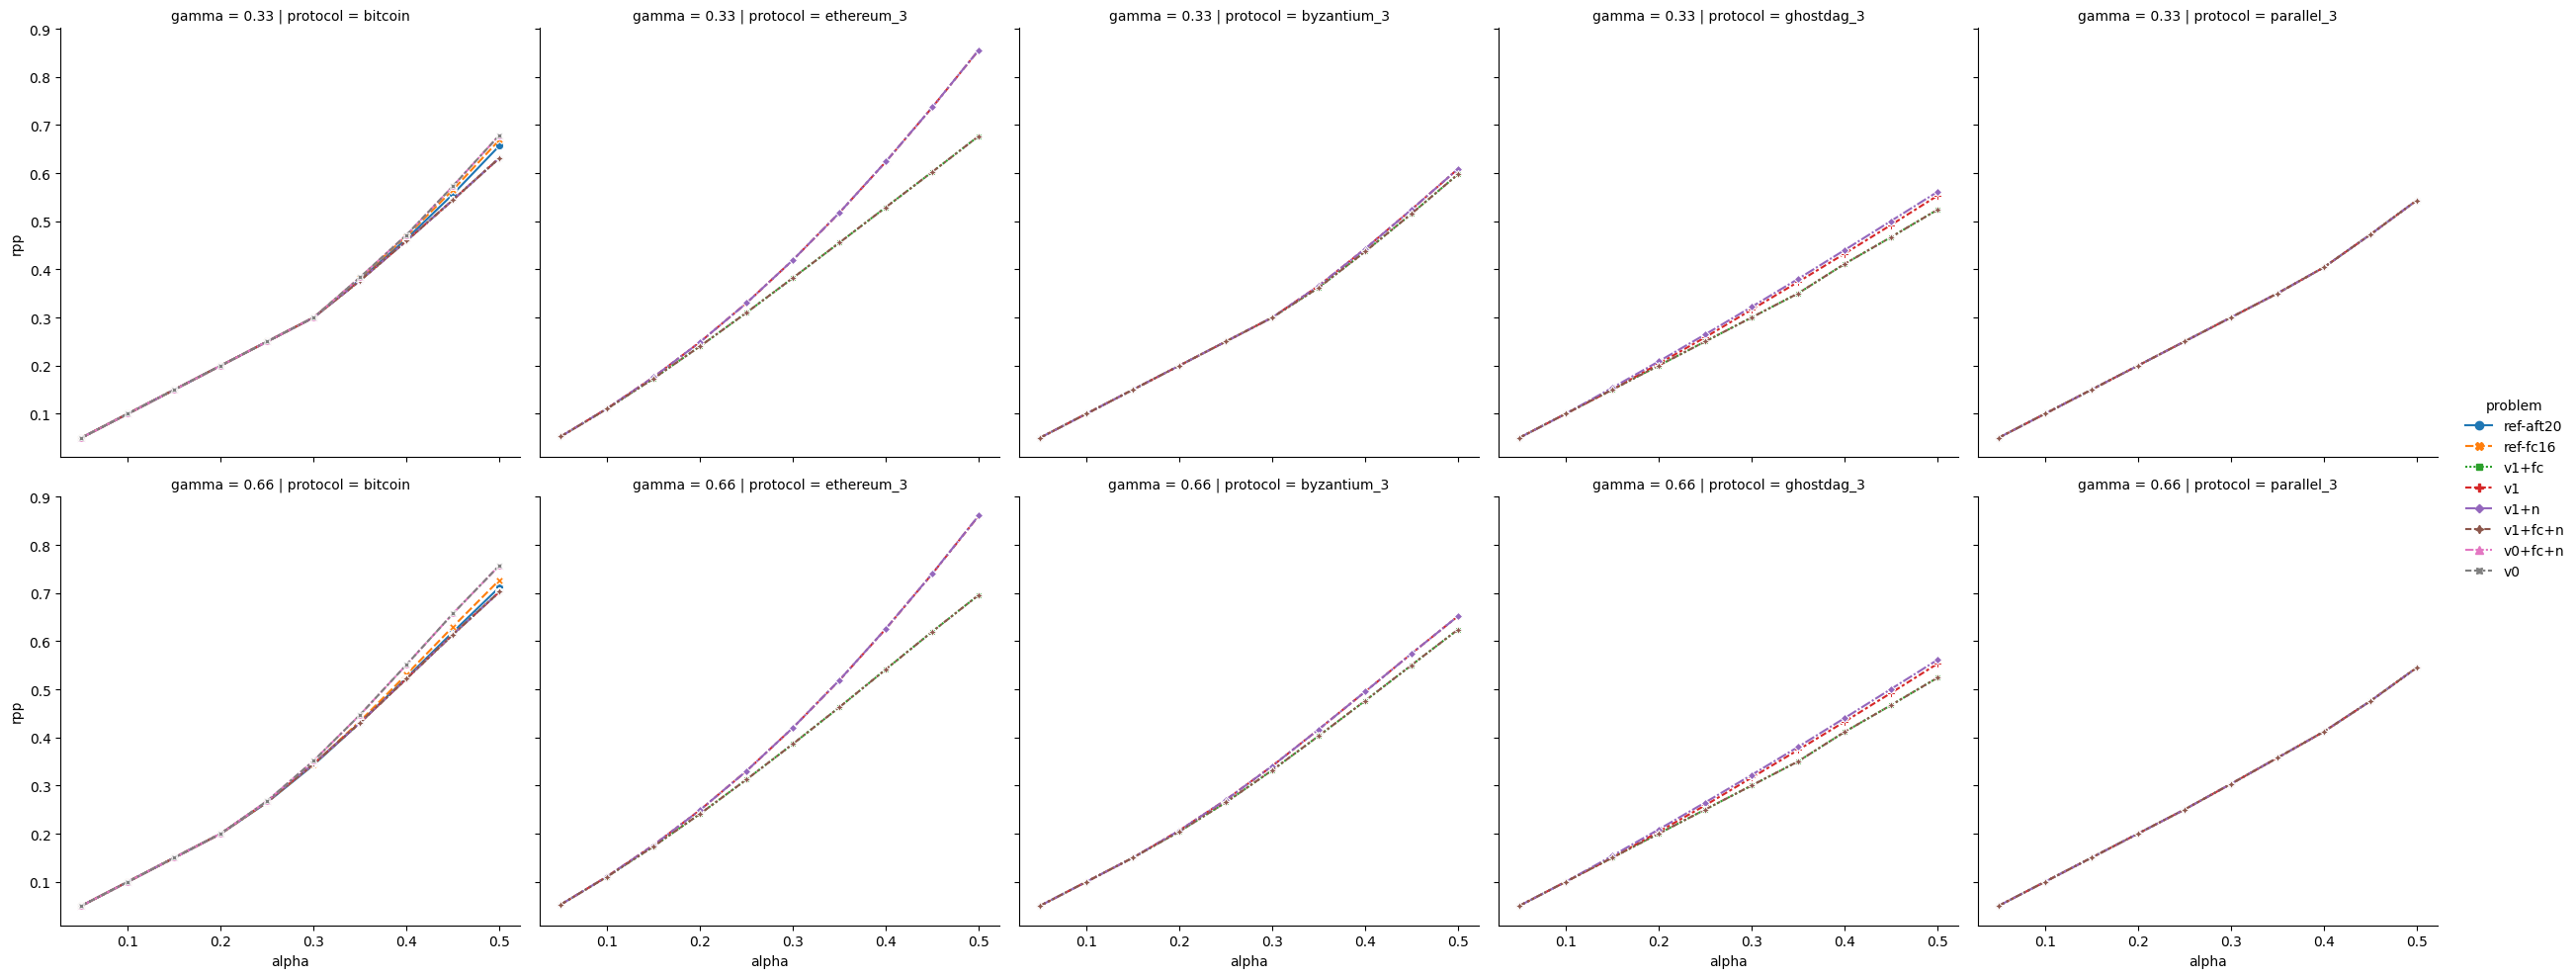

In [7]:
seaborn.relplot(
    data=df,
    kind="line",
    x="alpha",
    y="rpp",
    col="protocol",
    hue="problem",
    style="problem",
    markers=True,
    row="gamma",
)

# Revenue, PTO model, at source-model steady state

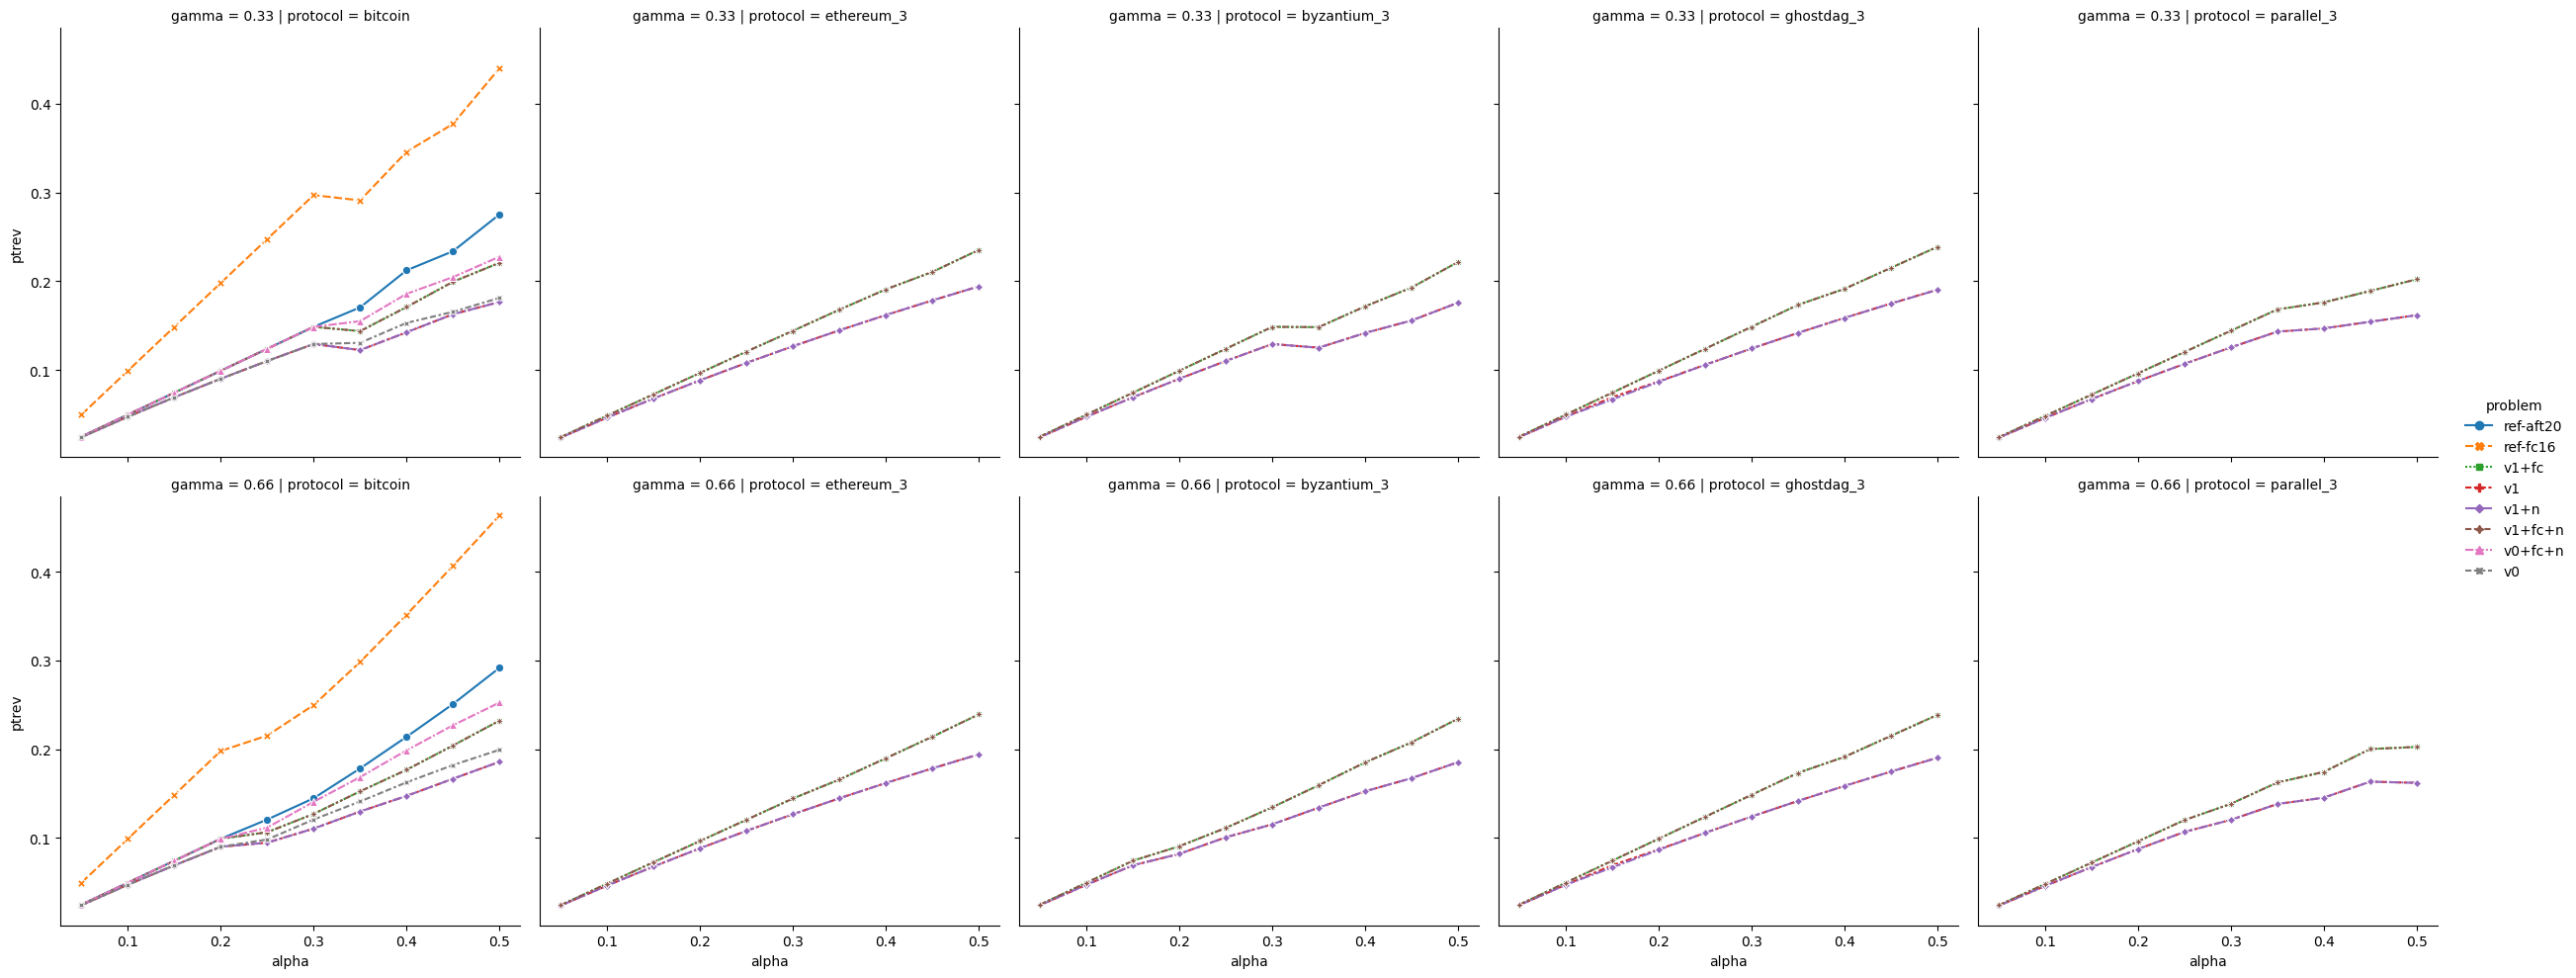

In [8]:
seaborn.relplot(
    data=df,
    kind="line",
    x="alpha",
    y="ptrev",
    col="protocol",
    hue="problem",
    style="problem",
    markers=True,
    row="gamma",
)